## Naive Bayes Assignment (Part B)
Name: Karishma Saikia

### Background
This is a AIRBNB dataset of Barcelona taken from Kaggle and it contains 20K rows and 20 columns.

### Problem Statement

Can I recommend room type based on price and neighborhood?

### Dataset Description

Based on the problem statement I will go ahead with three columns

- neighborhood: The name of the area or locality
- price : price of the property in dollars
- room_type: The type of property

### Data Exploration

In [141]:
import pandas as pd 

data_df = pd.read_csv("airbnb_barcelona.csv")
data_df.shape

(18838, 20)

Selecting the three columns of interest

In [142]:
data_df=data_df[['neighborhood','price','room_type']]

In [143]:
data_df.columns

Index(['neighborhood', 'price', 'room_type'], dtype='object')

In [144]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(28, 10))
# sns.set(style='whitegrid')

<Figure size 2016x720 with 0 Axes>

<Figure size 2016x720 with 0 Axes>

Plot to check count per neigborhood and if there are any outliers

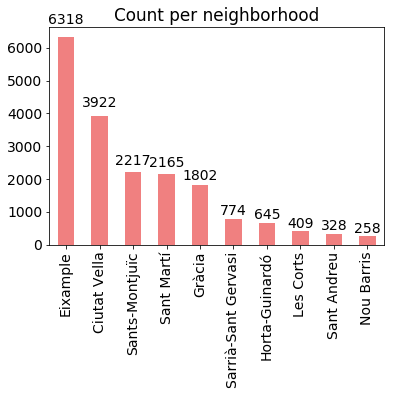

In [145]:
ax=data_df['neighborhood'].value_counts().plot(kind='bar',color='lightcoral')
ax.set_title("Count per neighborhood")

rects=ax.patches
def autolabel(rects):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(rects)
plt.savefig('neighborhood.png')

Plot to check the room type distribution in pie chart

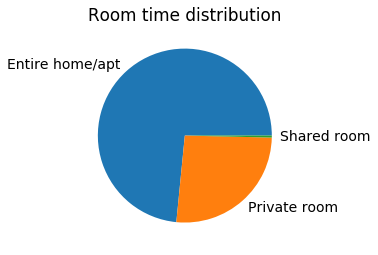

<Figure size 432x288 with 0 Axes>

In [211]:
data_pie = data_df.groupby(data_df.room_type).sum()
plt.axis('equal');
plt.pie(data_pie, labels=data_pie.index);
plt.title("Room time distribution")
plt.show()
plt.savefig('room_type.png')

### DATA CLEANING

**Let us look at the feature variable**

In [147]:
data_df['price'].describe()

count    18838.000000
mean       110.272481
std        118.363091
min         10.000000
25%         48.000000
50%         78.000000
75%        136.000000
max       3606.000000
Name: price, dtype: float64

Plot to check the outliers in price

Text(0.5,1,'Box Plot for price')

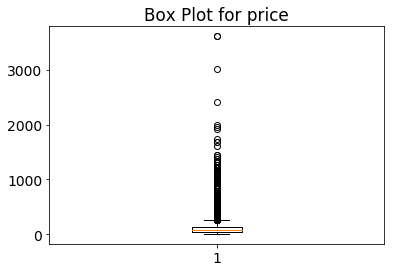

In [148]:
plt.boxplot(x=data_df['price'])
plt.title('Box Plot for price')

Above 1500 can be considered as outliers,
Saving it to a new dataset removing the ourliers

In [149]:
data=data_df[data_df.price < 1500]

In [150]:
data['price'].describe()

count    18827.000000
mean       108.998247
std        104.530158
min         10.000000
25%         48.000000
50%         78.000000
75%        136.000000
max       1443.000000
Name: price, dtype: float64

### Data manipulation/ Pre processing

The ***neighborhood*** feature is categorical, so need to convert it into integers giving each neighborhood an integer value and also let us save the converted codes and the corresponding neighborhoods in a dictionary for future reference

In [152]:
c=data['neighborhood'] .astype('category')
codes_cats_dict = dict(enumerate(c.cat.categories))
print(d)

{0: 'Ciutat Vella', 1: 'Eixample', 2: 'Gràcia', 3: 'Horta-Guinardó', 4: 'Les Corts', 5: 'Nou Barris', 6: 'Sant Andreu', 7: 'Sant Martí', 8: 'Sants-Montjuïc', 9: 'Sarrià-Sant Gervasi'}


In [155]:
#Changing the features
data['neighborhood'] = data['neighborhood'] .astype('category').cat.codes

C:\Users\karis\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [156]:
data['neighborhood']

0        1
1        1
2        1
3        1
4        1
5        8
6        8
7        1
8        8
9        1
10       8
11       0
12       1
13       1
14       7
15       8
16       1
17       8
18       8
19       0
20       7
21       8
22       1
23       1
24       7
25       2
26       1
27       1
28       1
29       0
        ..
18808    2
18809    7
18810    2
18811    5
18812    2
18813    7
18814    1
18815    8
18816    8
18817    2
18818    0
18819    3
18820    8
18821    1
18822    6
18823    7
18824    8
18825    2
18826    0
18827    1
18828    8
18829    2
18830    0
18831    8
18832    8
18833    1
18834    2
18835    2
18836    1
18837    8
Name: neighborhood, Length: 18827, dtype: int8

In [157]:
from sklearn.naive_bayes import GaussianNB
import numpy as np

In [158]:
# X = data[['price','accommodates','overall_satisfaction']].values
X = data[['price','neighborhood']].values
# y = data.iloc[:, 10].values  
y=data[['room_type']].values

Let us see how codes of the neighborhood are distributed

Text(0.5,1,'Neighborhood codes distribution')

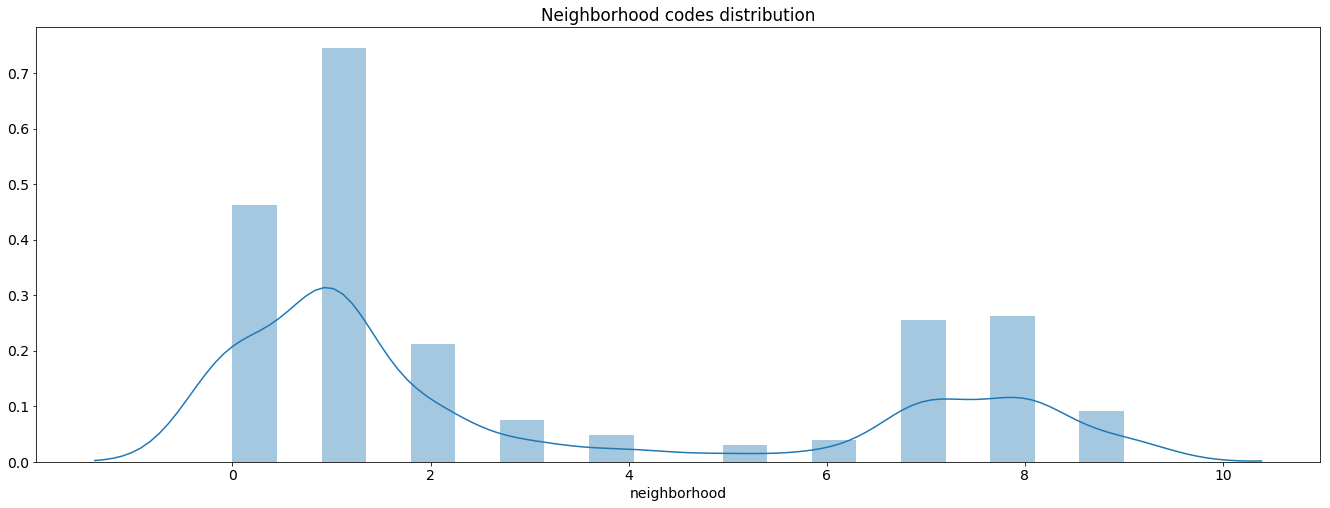

In [210]:
import seaborn as sns
from matplotlib import pyplot as plt

plt.figure(figsize=(23,8))
ax = sns.distplot(data['neighborhood'])
plt.title("Neighborhood codes distribution")

Before moving ahead with Naiv Bayes, i would like to check the correlation

In [160]:
data['price'].corr(data['neighborhood'],method='spearman')

-0.09000072046007207

Its pretty less, so we can move ahead with Naiv Bias

In [161]:
X.shape

(18827, 2)

In [162]:
y

array([['Shared room'],
       ['Shared room'],
       ['Shared room'],
       ...,
       ['Private room'],
       ['Private room'],
       ['Private room']], dtype=object)

In [163]:
np.ravel(y,order='C')
# y.ravel()

array(['Shared room', 'Shared room', 'Shared room', ..., 'Private room',
       'Private room', 'Private room'], dtype=object)

In [164]:
y.shape

(18827, 1)

Splitting it into Train and test to fit into model

In [191]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [192]:
model = GaussianNB()

In [193]:
model.fit(X_train, y_train)

C:\Users\karis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None, var_smoothing=1e-09)

In [194]:
from sklearn.metrics import classification_report, confusion_matrix  
y_pred = model.predict(X_test)  

In [198]:
from sklearn.metrics import accuracy_score
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred)) 
print(f"Accuracy score: {accuracy_score(y_test,y_pred)}")

[[1181  596    0]
 [  90 1867    0]
 [   5   27    0]]
                 precision    recall  f1-score   support

Entire home/apt       0.93      0.66      0.77      1777
   Private room       0.75      0.95      0.84      1957
    Shared room       0.00      0.00      0.00        32

       accuracy                           0.81      3766
      macro avg       0.56      0.54      0.54      3766
   weighted avg       0.83      0.81      0.80      3766

Accuracy score: 0.8093467870419543


C:\Users\karis\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\karis\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\karis\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


I think we can go ahead with this model as it has a accuracy score of 80.93% and matrices also seem fine.

**Let us do some predition!**

Providing a price of 100 dollars and area code 3 (we can check it from dictionary ***codes_cats_dict***), let us see what it recommends us.

In [208]:
codes_cats_dict

{0: 'Ciutat Vella',
 1: 'Eixample',
 2: 'Gràcia',
 3: 'Horta-Guinardó',
 4: 'Les Corts',
 5: 'Nou Barris',
 6: 'Sant Andreu',
 7: 'Sant Martí',
 8: 'Sants-Montjuïc',
 9: 'Sarrià-Sant Gervasi'}

In [176]:
p=[[100,3]]
model.predict(p)

array(['Private room'], dtype='<U15')

**So, private room is recommended at price 100 dollars and locality 'Horta-Guinardo'**